In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from model import ready_model
import matplotlib.pyplot as plt
from helper_functions import make_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

f:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
f:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
f:\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
X, Y = np.load("x.npy"), np.load("y.npy")

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=42)

In [3]:
model_train = ready_model()
checkpoint_filepath = 'model/random_model/'
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
                monitor='val_accuracy', verbose=1, 
                save_best_only=True, save_weights_only = True, mode='max')
                
model_train.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])
history = model_train.fit(xtrain,ytrain, epochs = 60, batch_size = 64, validation_data = (xtest, ytest), callbacks = checkpoint)

Epoch 1/60
21/21 [==============================] - ETA: 0s - loss: 1.2579 - accuracy: 0.5217
Epoch 00001: val_accuracy improved from -inf to 0.34239, saving model to model/random_model\
21/21 [==============================] - 2s 36ms/step - loss: 1.2579 - accuracy: 0.5217 - val_loss: 1.3248 - val_accuracy: 0.3424
Epoch 2/60
16/21 [=====================>........] - ETA: 0s - loss: 0.8469 - accuracy: 0.6670
Epoch 00002: val_accuracy improved from 0.34239 to 0.34601, saving model to model/random_model\
21/21 [==============================] - 1s 29ms/step - loss: 0.8651 - accuracy: 0.6568 - val_loss: 1.3132 - val_accuracy: 0.3460
Epoch 3/60
19/21 [==========================>...] - ETA: 0s - loss: 0.7469 - accuracy: 0.6891
Epoch 00003: val_accuracy improved from 0.34601 to 0.34964, saving model to model/random_model\
21/21 [==============================] - 1s 27ms/step - loss: 0.7418 - accuracy: 0.6871 - val_loss: 1.3167 - val_accuracy: 0.3496
Epoch 4/60
19/21 [=========================

In [4]:
check_model = ready_model()
check_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = SparseCategoricalCrossentropy(), metrics = ["accuracy"])
check_model.load_weights(checkpoint_filepath)
check_model.evaluate(xtest, ytest)

18/18 [==============================] - 0s 4ms/step - loss: 0.8287 - accuracy: 0.7301


[0.828711211681366, 0.7300724387168884]

In [5]:
y_pred = check_model.predict(xtest)
y_preds_ready = y_pred.argmax(axis=1)
print(metrics.recall_score(ytest, y_preds_ready, average='macro'))

0.716047779227751


<AxesSubplot:>

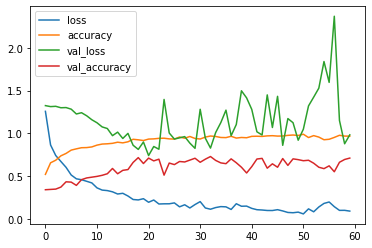

In [6]:
out = pd.DataFrame(history.history)
out.plot()

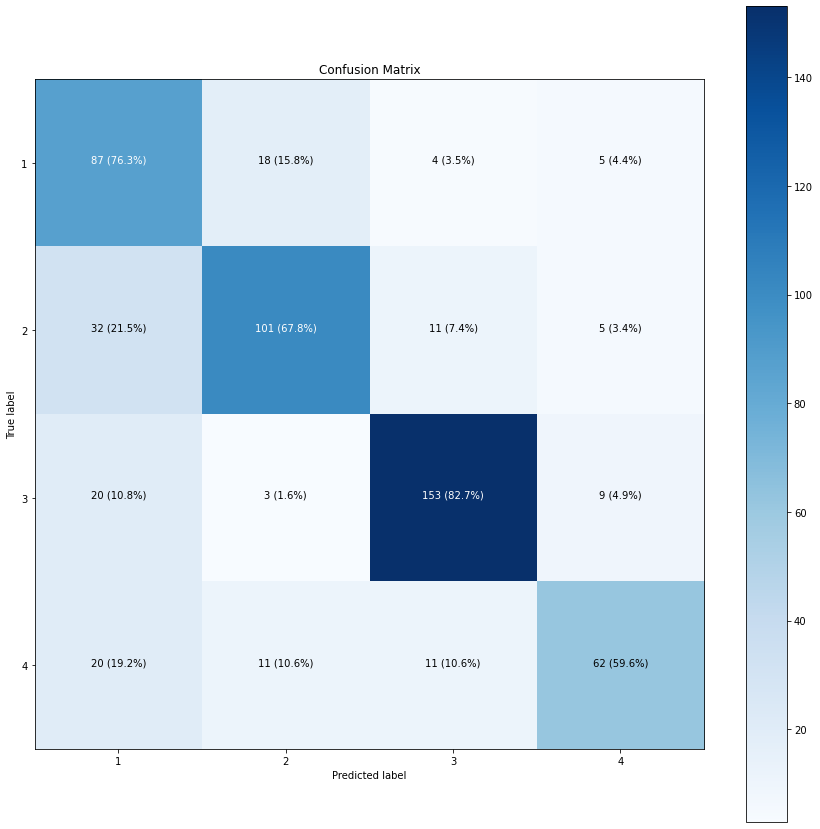

In [7]:
make_confusion_matrix(y_true=ytest, 
                      y_pred=y_preds_ready,
                      classes=['1', '2', '3', '4'],
                      figsize=(15, 15),
                      text_size=10)